In [1]:
import sys
sys.path.insert(0, "../autowrite")

In [2]:
from Iamondb import Iamondb
from Visualizer import Visualizer

In [9]:
iamondb = Iamondb("./../../data/raw_data")

In [10]:
touch_points, labels = iamondb.get_samples()

KeyboardInterrupt: 

In [ ]:
print(len(touch_points), len(labels))

In [ ]:
example_touch_points = touch_points[1010]
example_text = labels[1010]

In [3]:
visualizer = Visualizer()

Vera, Though international in outlook,


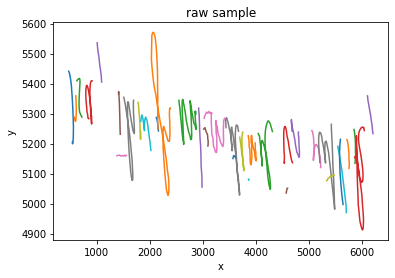

In [9]:
visualizer.plot_raw_sample(example_touch_points)
print(example_text)

In [4]:
from Preprocessor import Preprocessor

In [5]:
preprocessor = Preprocessor("../../data/processed_data/alphabet")

In [14]:
normalized = preprocessor.normalize_strokes(example_touch_points)
visualizer.plot_raw_sample(normalized[:10])
print(preprocessor.decode_sample(preprocessor.encode_sample(example_text)))

['V', 'e', 'r', 'a', ',', ' ', 'T', 'h', 'o', 'u', 'g', 'h', ' ', 'i', 'n', 't', 'e', 'r', 'n', 'a', 't', 'i', 'o', 'n', 'a', 'l', ' ', 'i', 'n', ' ', 'o', 'u', 't', 'l', 'o', 'o', 'k', ',']


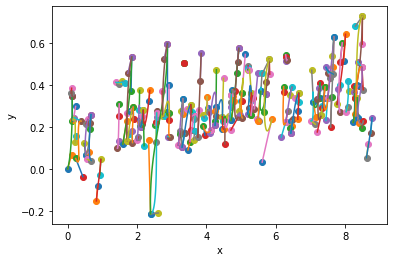

In [17]:
fitted_bezier_curves = preprocessor.strokes_to_bezier(example_touch_points)
visualizer.plot_bezier_curves(fitted_bezier_curves, control_points=True)

In [13]:
import sys

bezier_features = []

for i, sample in enumerate(touch_points):
    sys.stdout.write(f"\r{(float(i)/len(touch_points)*100):.2f}%")
    bezier_features.append(preprocessor.strokes_to_bezier(sample))

padded_bezier_features = preprocessor.pad_data(bezier_features, value=0, width=11)

99.99%

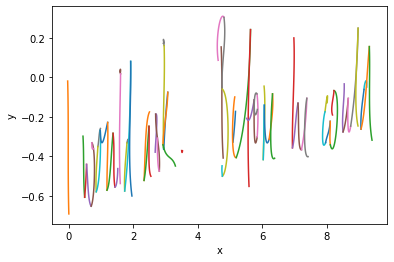

In [18]:
visualizer.plot_bezier_curves(padded_bezier_features[1000])

In [16]:
import numpy as np
np.save("../../data/processed_data/bezier_features_padded_improved", padded_bezier_features)

In [19]:
target = []

for i, sample in enumerate(labels):
    sys.stdout.write(f"\r{(float(i)/len(touch_points)*100):.2f}%")
    target.append(preprocessor.encode_sample(sample))

padded_target = preprocessor.pad_data(target, value=82)

82.08%

99.99%

In [20]:
np.save("../../data/processed_data/target_padded", padded_target)

In [6]:
from Encoder import Encoder

In [13]:
Encoder("./../autowrite/model_data/weights/cp.ckpt", "./../autowrite/model_data/alphabet")

../autowrite/model_data/weights
